In [63]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Defines transform pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])

# Download and transform
train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

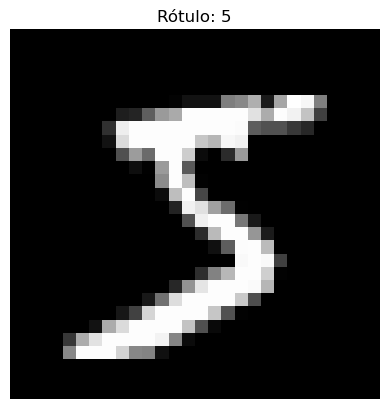

In [64]:
import matplotlib.pyplot as plt

img, label = train_dataset[0]
img = img.squeeze(0)

def plot_image(img):
    plt.imshow(img, cmap='gray')
    plt.title(f'Rótulo: {label}')
    plt.axis('off')
    plt.show()

plot_image(img)

In [65]:
class SelectionMask:
    def __init__(self, shape, dtype=None, device=None):
        self.mask = torch.randn(shape, dtype=dtype, device=device)
        self.mask[self.mask == 0] = torch.finfo(dtype).tiny #Ensures abscense of zeros
        
    # def dot(self, tensor):
    #     return torch.dot(self.mask.flatten(), tensor.flatten().to(self.device))
    
    def interpolate(self, new_size, mode="nearest"):
        input_4d = self.mask.unsqueeze(0).unsqueeze(0)  # Adds batch and channel dims

        interpolated = F.interpolate(
            input_4d.float(),
            size=new_size,
            mode=mode,
        ).squeeze(0).squeeze(0)  # Remove batch e channel dims

        temp = SelectionMask(self.mask.shape, dtype=self.mask.dtype)
        temp.mask = interpolated.to(self.mask.dtype)

        return temp
    
    def binarize(self, treshold=0.5):
        return (torch.abs(self.mask) >= treshold).float()
    

In [ ]:
x = torch.rand((3,3))
x.shape

torch.Size([3, 3])

In [67]:
mask = SelectionMask(shape=x.shape, dtype=x.dtype)
mask.mask.shape

torch.Size([3, 3])

In [68]:
mask = mask.interpolate((28,28))
mask.mask.shape


torch.Size([28, 28])

In [69]:
mask = mask.binarize()
mask.shape

torch.Size([28, 28])

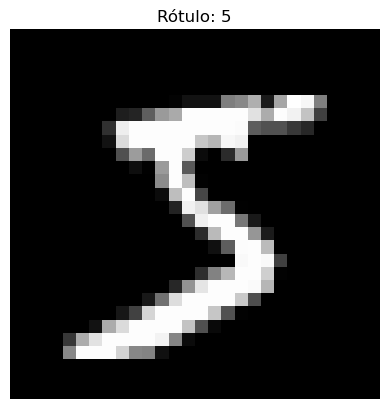

torch.Size([28, 28])


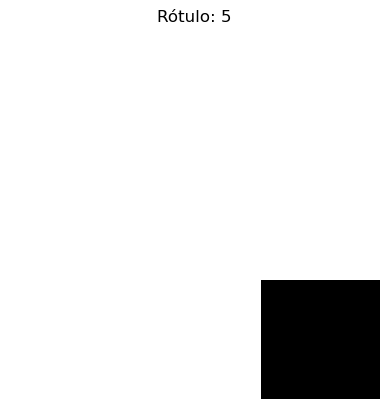

torch.Size([28, 28])


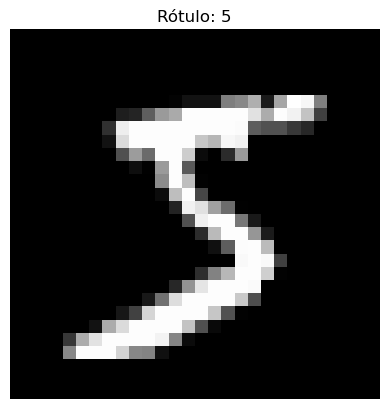

In [70]:

img, _ = train_dataset[0]
img = img.squeeze(0)
plot_image(img)
print(img.shape)
plot_image(mask)
print(mask[:][:][:].shape)
temp = img*mask
plot_image(temp)

## TODO
- refatorar a mascara para ser automatica a quantidade de canais
- SEM TAMANHO DINÂMICO
- tem variavel que escolhe o tamanho 
- função aplicação da mascara na imagem
- mapa de parâmetros -> definir o que vai ser treinado ou não
